In [1]:
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
from shapely.ops import unary_union
from shapely.prepared import prep
from shapely.ops import nearest_points
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
land_shp_fname = shpreader.natural_earth(resolution='10m',
                                       category='physical', name='land')

islands_shp_fname = shpreader.natural_earth(resolution='10m',
                                       category='physical', name='minor_islands')

land = list(shpreader.Reader(land_shp_fname).geometries()) + \
       list(shpreader.Reader(islands_shp_fname).geometries())

land_geom = unary_union(land)
land = prep(land_geom)

def is_water(x, y):
    return not land.contains(sgeom.Point(x, y))

KeyboardInterrupt: 

In [14]:
is_water(-15.414419, 107.735196)

True

In [16]:
is_water(-4.69772,55.3973)

False

In [2]:
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
from shapely.ops import unary_union
from shapely.prepared import prep

land_shp_fname = shpreader.natural_earth(resolution='50m',
                                       category='physical', name='ocean')

land = list(shpreader.Reader(land_shp_fname).geometries())

land_geom = unary_union(land)
land = prep(land_geom)

def is_water(x, y):
    return land.contains(sgeom.Point(x, y))

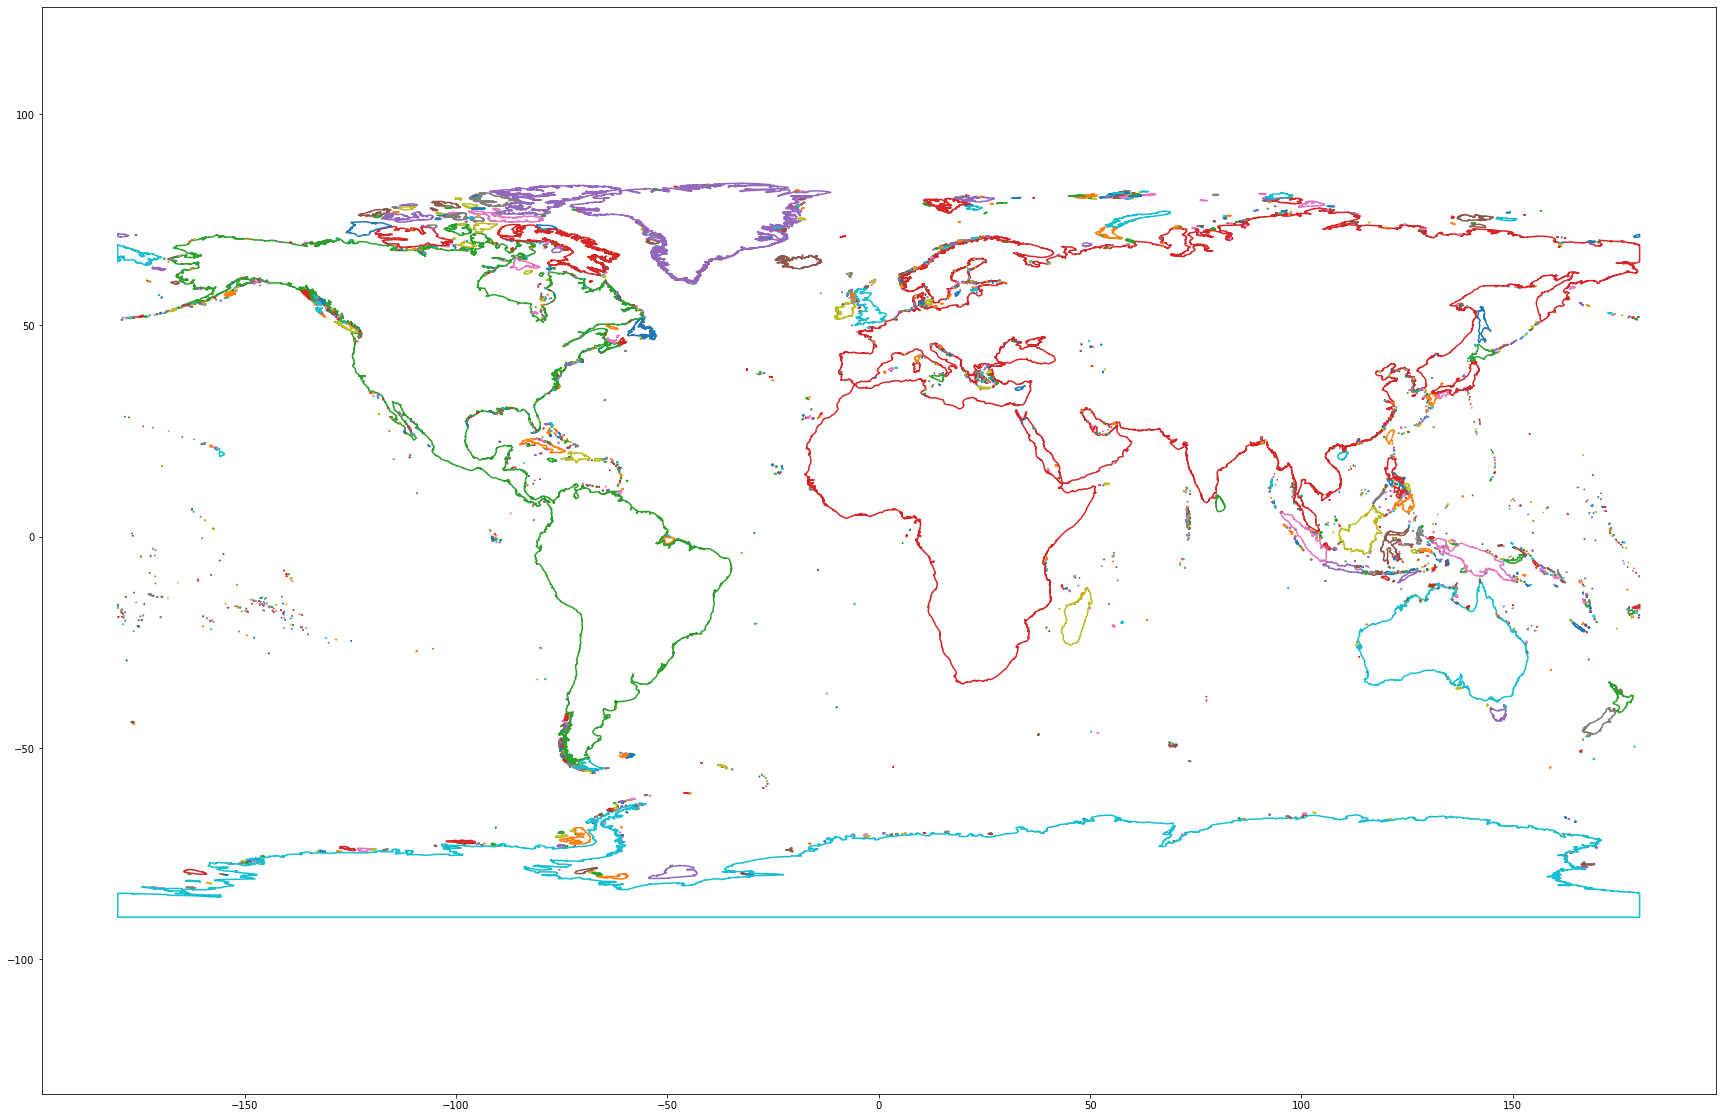

In [38]:
fig, axs = plt.subplots(figsize=(30, 20))
for geom in land_geom.geoms:
    axs.plot(*geom.exterior.xy)

#plt.ploy
# Set (current) axis to be equal before showing plot
plt.gca().axis("equal")
plt.show()

In [3]:
is_water(-4.69772,55.3973)

False

In [2]:
land_shp_fname = shpreader.natural_earth(resolution='10m',
                                       category='physical', name='land')

land = list(shpreader.Reader(land_shp_fname).geometries())

land_geom = unary_union(land)
land = prep(land_geom)

def is_water(x, y):
    return not land.contains(sgeom.Point(x, y))

In [25]:
#is_water(-4.69772,55.3973)
is_water(40.454908, -3.815220)

AttributeError: 'PreparedGeometry' object has no attribute 'difference'

In [33]:
#Point([-4.390278, 39.627043]).distance(land_geom)
land.contains(Point([4.360693785353771, 48.85555377614469]))

True

In [28]:
type(land_geom)

shapely.geometry.multipolygon.MultiPolygon

In [41]:
import fiona
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
from shapely.prepared import prep

In [53]:
geoms = fiona.open(
            shpreader.natural_earth(resolution='10m',
                                    category='physical', name='land'))

land_geom = sgeom.MultiPolygon([sgeom.shape(geom['geometry'])
                                for geom in geoms])

land = prep(land_geom)

ValueError: Sequences of multi-polygons are not valid arguments

In [52]:
#land.contains(Point([4.360693785353771, 48.85555377614469]))
land.contains(Point([-25.841602, 72.067181]))


False